In [23]:
import pandas as pd
import wfdb
import ecg_plot
import ptbxlae.dataprocessing

In [24]:
labels = pd.read_csv('../data/ptbxl_database.csv')
labels

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21796,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21797,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr


In [25]:
labels.patient_id = labels.patient_id.astype(int)

def get_first_clean(g):
    clean_only = g[g[['baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems']].isna().all(axis=1)]
    if len(clean_only) > 0:
        return clean_only.iloc[0]
    else:
        return None

labels = labels.groupby('patient_id').apply(get_first_clean)
labels = labels.dropna(subset='ecg_id')

labels

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
patient_id,,,,,,,,,,,,,,,,,,,,,
302,2510.0,302.0,76.0,0.0,170.0,80.0,3.0,1.0,AT-6 C 5.5,1989-02-22 10:28:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2.0,records100/02000/02510_lr,records500/02000/02510_hr
304,7749.0,304.0,77.0,1.0,158.0,57.0,6.0,1.0,AT-6 C 5.5,1992-02-07 14:01:33,...,True,NaN,NaN,NaN,NaN,NaN,NaN,3.0,records100/07000/07749_lr,records500/07000/07749_hr
305,6318.0,305.0,62.0,1.0,165.0,80.0,10.0,1.0,AT-6 6,1991-06-26 16:13:38,...,True,NaN,NaN,NaN,NaN,1ES,NaN,4.0,records100/06000/06318_lr,records500/06000/06318_hr
306,961.0,306.0,65.0,1.0,168.0,95.0,8.0,1.0,AT-6 6,1987-07-22 13:40:59,...,True,NaN,NaN,NaN,NaN,NaN,NaN,8.0,records100/00000/00961_lr,records500/00000/00961_hr
307,2039.0,307.0,59.0,1.0,171.0,75.0,1.0,1.0,AT-6 C 5.5,1988-07-31 12:27:49,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10.0,records100/02000/02039_lr,records500/02000/02039_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21792,18611.0,21792.0,81.0,0.0,NaN,NaN,1.0,2.0,CS-12,1997-09-27 18:46:18,...,True,NaN,NaN,NaN,NaN,NaN,NaN,9.0,records100/18000/18611_lr,records500/18000/18611_hr
21793,19780.0,21793.0,77.0,1.0,NaN,NaN,1.0,2.0,AT-60 3,1998-10-17 16:32:49,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10.0,records100/19000/19780_lr,records500/19000/19780_hr
21795,17210.0,21795.0,50.0,0.0,NaN,NaN,1.0,2.0,CS-12,1996-11-10 14:53:01,...,True,NaN,NaN,NaN,NaN,NaN,NaN,9.0,records100/17000/17210_lr,records500/17000/17210_hr


In [26]:
labels[['ecg_id', 'patient_id', 'filename_lr']]

,ecg_id,patient_id,filename_lr
patient_id,,,
302,2510.0,302.0,records100/02000/02510_lr
304,7749.0,304.0,records100/07000/07749_lr
305,6318.0,305.0,records100/06000/06318_lr
306,961.0,306.0,records100/00000/00961_lr
307,2039.0,307.0,records100/02000/02039_lr
...,...,...,...
21792,18611.0,21792.0,records100/18000/18611_lr
21793,19780.0,21793.0,records100/19000/19780_lr
21795,17210.0,21795.0,records100/17000/17210_lr


In [27]:
labels.patient_id.isna().any()

False

In [9]:
clean_lables = labels[labels[['baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems']].isna().all(axis=1)]
clean_lables

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
6,7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,...,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00007_lr,records500/00000/00007_hr
9,10,9456.0,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1984-12-12 14:12:46,...,True,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00010_lr,records500/00000/00010_hr
11,12,11031.0,43.0,1,NaN,44.0,2.0,0.0,CS-12 E,1984-12-21 08:02:26,...,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00012_lr,records500/00000/00012_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,21830,10520.0,86.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 07:53:21,...,True,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/21000/21830_lr,records500/21000/21830_hr
21792,21831,11905.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 12:49:25,...,True,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/21000/21831_lr,records500/21000/21831_hr
21793,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21832_lr,records500/21000/21832_hr
21795,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr


In [10]:
sig, meta = ptbxlae.dataprocessing.load_single_record()
print(sig)
print(meta)

[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
{'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


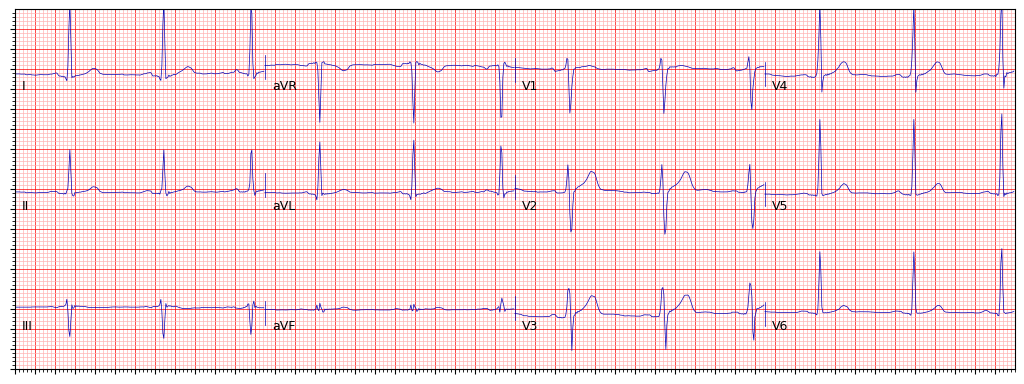

In [23]:
import matplotlib.pyplot as plt

def plot_single_record(id: int=1, lowres: bool=True):
    sig, _ = ptbxlae.dataprocessing.load_single_record(id=id, lowres=lowres)
    ecg_plot.plot(sig.transpose()[:,:250], sample_rate=100, columns=4, title=None)
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    ecg_plot.show()

plot_single_record(id=2178)